In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.image as mpimg
from tqdm import tqdm
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Get images
nbImages = 16
y = []
i = 0
for filename in tqdm(os.listdir('data/images')[:nbImages]):
    img = cv2.resize(
        mpimg.imread('data/images/'+filename),
        dsize=(128, 128),
        interpolation=cv2.INTER_CUBIC
    )
    y.append(img)
y = np.array(y)
print(y.shape)

100%|██████████| 16/16 [00:00<00:00, 364.60it/s]


(16, 128, 128, 3)


In [3]:
# Transform img to Grayscale
X = []
for img in tqdm(y):
    X.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
X = np.array(X)
print(X.shape)

100%|██████████| 16/16 [00:00<00:00, 8018.74it/s]


(16, 128, 128)


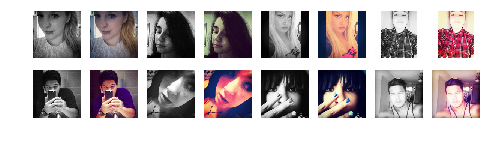

In [4]:
columns = 8
rows = 2
fig=plt.figure(figsize=(columns, rows))
for i in range(1, columns*rows +1,2):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X[i-1], cmap='gray')
    plt.axis('off')
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(y[i-1])
    plt.axis('off')
plt.show()

In [5]:
# Keras
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential

X_reshaped = X.reshape(X.shape[0],128,128,1)

model = Sequential()
model.add(Conv2D(3, kernel_size=5, padding="same", activation = 'relu', input_shape=X_reshaped.shape[1:]))
model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(192, kernel_size=3, padding="same", activation = 'relu'))
#model.add(Flatten())
model.add(Reshape((128,128,3)))

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 3)       78        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_

In [6]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['accuracy']
)

In [7]:

history = model.fit(X_reshaped, y, epochs=10, batch_size=1, verbose=2)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 2s - loss: 21803.0409 - acc: 0.3403
Epoch 2/10
 - 1s - loss: 18219.8699 - acc: 0.5092
Epoch 3/10
 - 1s - loss: 14447.6079 - acc: 0.5782
Epoch 4/10
 - 1s - loss: 9998.2339 - acc: 0.6157
Epoch 5/10
 - 1s - loss: 6438.3672 - acc: 0.6195
Epoch 6/10
 - 1s - loss: 5686.2854 - acc: 0.6178
Epoch 7/10
 - 1s - loss: 5495.1916 - acc: 0.6212
Epoch 8/10
 - 1s - loss: 5378.0222 - acc: 0.6229
Epoch 9/10
 - 1s - loss: 5407.6114 - acc: 0.6212
Epoch 10/10
 - 1s - loss: 5347.9476 - acc: 0.6246


In [8]:
history.history.keys()

dict_keys(['loss', 'acc'])

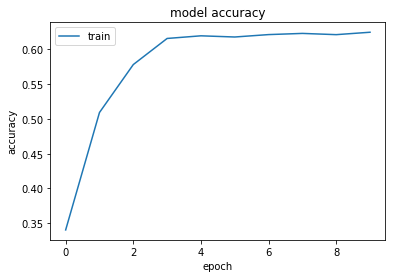

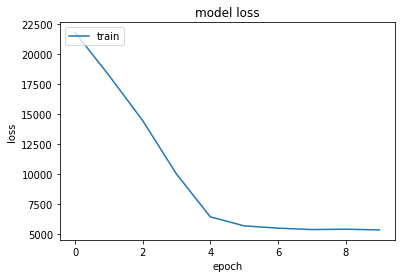

In [9]:
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

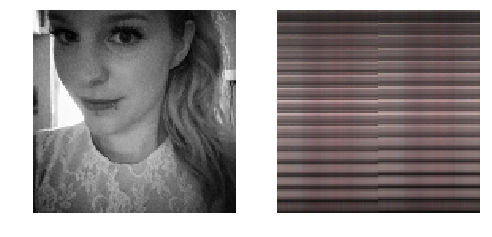

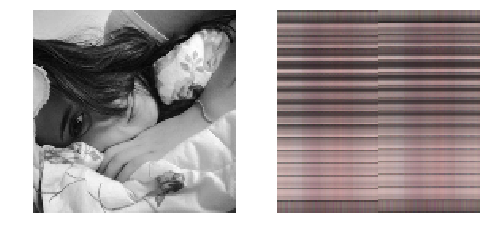

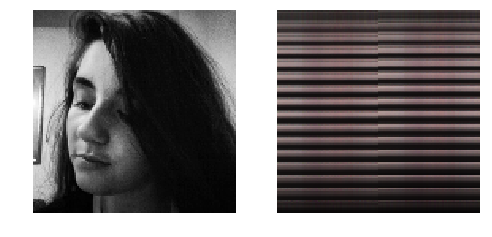

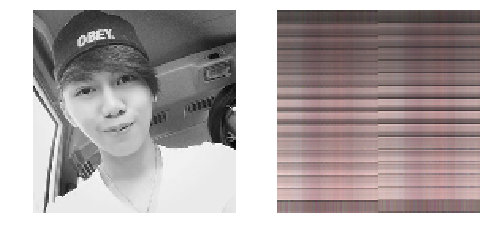

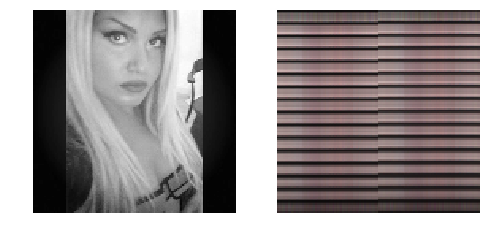

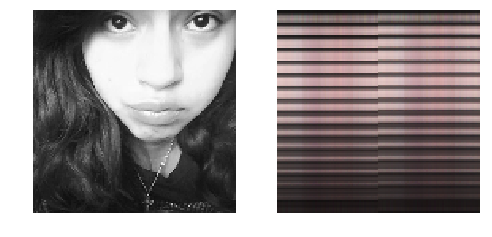

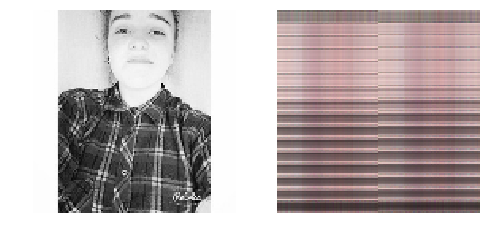

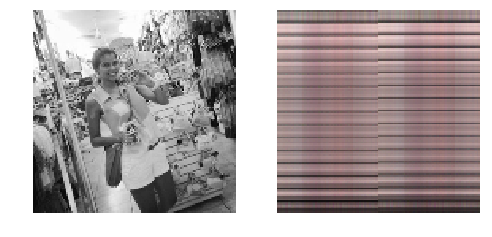

In [17]:

for id in range(8):
    fig = plt.figure(figsize=(8, 4))
    fig.add_subplot(1, 2, 1)
    plt.imshow(X[id], cmap='gray')
    plt.axis('off')
    fig.add_subplot(1, 2, 2)
    plt.imshow(np.uint8(model.predict(X_reshaped[id:id+1])[0]))
    plt.axis('off')
    plt.show()

In [45]:
model.predict(X[id:id+1])[0]

array([[[137.07565 , 118.05376 , 142.86879 ],
        [119.38631 , 131.82529 , 132.74886 ],
        [139.86366 , 155.75972 , 137.02458 ],
        ...,
        [119.6754  , 108.5287  , 108.98918 ],
        [110.7999  , 109.512856, 106.4543  ],
        [109.56464 , 105.8898  , 122.16456 ]],

       [[125.51641 , 103.55933 , 110.8464  ],
        [127.22556 , 114.495544, 108.19419 ],
        [122.10023 , 105.12195 , 115.84727 ],
        ...,
        [107.79265 ,  90.80696 ,  95.12504 ],
        [100.9481  ,  94.56061 ,  96.87515 ],
        [ 98.35019 ,  90.18765 ,  93.249985]],

       [[ 83.689995,  79.70961 ,  75.37458 ],
        [ 82.77092 ,  75.354546,  75.41984 ],
        [ 82.81175 ,  76.572945,  76.854904],
        ...,
        [ 88.65593 ,  81.01861 ,  81.72174 ],
        [ 86.4696  ,  81.289314,  79.87666 ],
        [ 86.20113 ,  83.58651 ,  83.268654]],

       ...,

       [[107.14788 ,  94.87948 ,  95.74647 ],
        [108.16222 ,  99.69899 ,  99.09021 ],
        [111.635445,  